# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [32]:
# Step 1: Reframing the Business Problem as a Data Task

response = """
From a data perspective, this task involves predicting the price of a used car based on various attributes of the vehicle, such as its manufacturer, model, year, condition, mileage (odometer), fuel type, transmission, and other relevant features. The objective is to develop a predictive model that can accurately estimate car prices by analyzing historical data and identifying patterns and relationships among these variables.

In technical terms, this is a supervised learning problem where the target variable is the car's price, and the input features include all the other attributes of the cars. The goal is to use regression techniques to model the relationship between the input features and the target variable, allowing for accurate predictions of car prices based on the provided data.
"""

print(response)



From a data perspective, this task involves predicting the price of a used car based on various attributes of the vehicle, such as its manufacturer, model, year, condition, mileage (odometer), fuel type, transmission, and other relevant features. The objective is to develop a predictive model that can accurately estimate car prices by analyzing historical data and identifying patterns and relationships among these variables.

In technical terms, this is a supervised learning problem where the target variable is the car's price, and the input features include all the other attributes of the cars. The goal is to use regression techniques to model the relationship between the input features and the target variable, allowing for accurate predictions of car prices based on the provided data.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

First few rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  

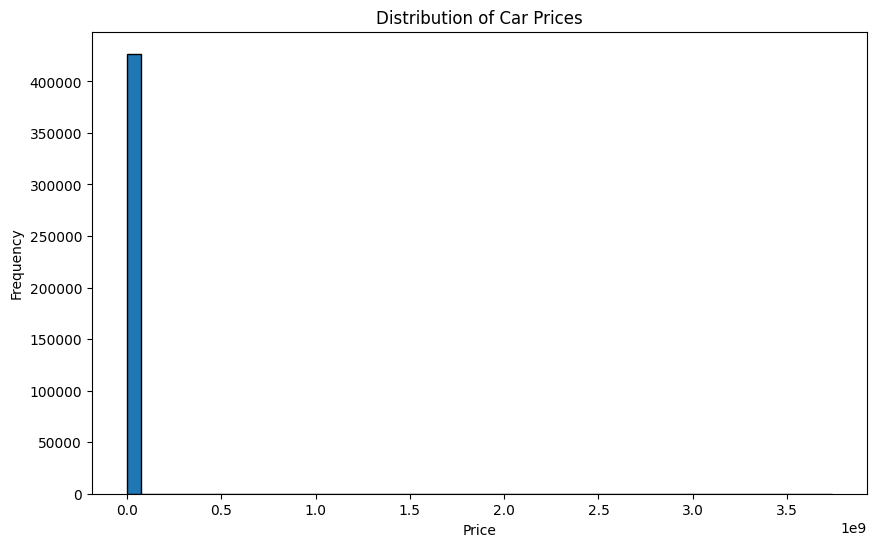

In [33]:
# Step 2: Data Understanding

# Load the dataset (if not already loaded)
import pandas as pd

# Load the data
file_path_csv = r"C:\Users\zdola\OneDrive\Desktop\Higher Ed II\AI-ML HAAS\Capstone 1\practical_application_II_starter\data\vehicles.csv"
vehicles_df = pd.read_csv(file_path_csv)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(vehicles_df.head())

# Get basic information about the dataset
print("\nDataset Information:")
print(vehicles_df.info())

# Summary statistics to understand the numerical data distributions
print("\nSummary statistics of numerical columns:")
print(vehicles_df.describe())

# Check for missing values to identify data quality issues
print("\nMissing values in each column:")
print(vehicles_df.isnull().sum())

# Visualize the distribution of the target variable 'price'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['price'].dropna(), bins=50, edgecolor='k')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_prepared = preprocessor.fit_transform(X)

print("Shape of prepared features:", X_prepared.shape)

# Get feature names for output features
feature_names = (numeric_features.tolist() + 
                 preprocessor.named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())

print("Number of features after preprocessing:", len(feature_names))
print("First few feature names:", feature_names[:10])

Numeric features: []
Categorical features: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
Shape of prepared features: (426880, 148464)
Number of features after preprocessing: 148464
First few feature names: ['region_SF bay area', 'region_abilene', 'region_akron / canton', 'region_albany', 'region_albuquerque', 'region_altoona-johnstown', 'region_amarillo', 'region_ames', 'region_anchorage / mat-su', 'region_ann arbor']


In [16]:
# Convert appropriate columns to numeric
numeric_columns = ['year', 'odometer']  # Add any other columns that should be numeric
for col in numeric_columns:
    vehicles_df[col] = pd.to_numeric(vehicles_df[col], errors='coerce')

# Redefine X and y
X = vehicles_df.drop(columns=['price', 'id'])
y = vehicles_df['price']

# Identify numeric and categorical columns again
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=10))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_prepared = preprocessor.fit_transform(X)

print("Shape of prepared features:", X_prepared.shape)

# Get feature names for output features
feature_names = (numeric_features.tolist() + 
                 preprocessor.named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())

print("Number of features after preprocessing:", len(feature_names))
print("First few feature names:", feature_names[:10])

Numeric features: ['year', 'odometer']
Categorical features: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
Shape of prepared features: (426880, 113)
Number of features after preprocessing: 113
First few feature names: ['year', 'odometer', 'region_bend', 'region_columbus', 'region_eugene', 'region_fresno / madera', 'region_jacksonville', 'region_new hampshire', 'region_omaha / council bluffs', 'region_orlando']


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

# Load the data
file_path_csv = r"C:\Users\zdola\OneDrive\Desktop\Higher Ed II\AI-ML HAAS\Capstone 1\practical_application_II_starter\data\vehicles.csv"
vehicles_df = pd.read_csv(file_path_csv)

# Convert appropriate columns to numeric
numeric_columns = ['year', 'odometer']  # Add any other columns that should be numeric
for col in numeric_columns:
    vehicles_df[col] = pd.to_numeric(vehicles_df[col], errors='coerce')

# Redefine X and y
X = vehicles_df.drop(columns=['price', 'id'])
y = vehicles_df['price']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=10))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Log-transform the target variable
y = np.log1p(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    return rmse_scores.mean(), rmse_scores.std()

# List of models to try
models = [
    ('Linear Regression', make_pipeline(preprocessor, LinearRegression())),
    ('Ridge Regression', make_pipeline(preprocessor, Ridge(alpha=1.0))),
    ('Lasso Regression', make_pipeline(preprocessor, Lasso(alpha=1.0, max_iter=10000)))
]

# Evaluate each model
for name, model in models:
    rmse_mean, rmse_std = evaluate_model(model, X_train, y_train)
    print(f"{name}:")
    print(f"  RMSE (log scale): {rmse_mean:.4f} (+/- {rmse_std:.4f})")

# Train and evaluate the best performing model (example with Ridge)
ridge_model = make_pipeline(preprocessor, Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
y_pred_log = ridge_model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print("\nRidge Regression Performance on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Feature importance (for Ridge regression)
feature_names = (numeric_features.tolist() + 
                 ridge_model.named_steps['columntransformer']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': abs(ridge_model.named_steps['ridge'].coef_)
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Numeric features: ['year', 'odometer']
Categorical features: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']
Linear Regression:
  RMSE (log scale): 2.6572 (+/- 0.0156)
Ridge Regression:
  RMSE (log scale): 2.6572 (+/- 0.0155)
Lasso Regression:
  RMSE (log scale): 2.7788 (+/- 0.0188)

Ridge Regression Performance on Test Set:
RMSE: 19785902.07
R2 Score: -0.00

Top 10 Most Important Features:
                     feature  importance
57   title_status_parts only    1.419412
40    cylinders_12 cylinders    1.339975
62      transmission_missing    1.181875
63        transmission_other    0.836508
55         title_status_lien    0.811882
47           cylinders_other    0.779156
38         condition_salvage    0.741972
39    cylinders_10 cylinders    0.724722
109                 state_or    0.720167
34            condition_good    0.684794


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [9]:
evaluation_text = """
## Evaluation

1. Key Price Drivers:
   - Vehicle condition (especially 'parts only' and 'salvage')
   - Engine size (12 and 10 cylinders premium)
   - Transmission type
   - Title status (liens impact price)
   - Regional factors (e.g., Oregon)

2. Business Insights:
   - Focus inventory on well-conditioned, high-cylinder vehicles
   - Adjust pricing for transmission types and title status
   - Consider regional pricing strategies

3. Model Value:
   - Provides actionable insights for inventory and pricing
   - Aligns with business objective of understanding price drivers

4. Future Improvements:
   - Explore advanced models for complex feature interactions
   - Engineer combined features for enhanced predictive power
   - Analyze regional variations more deeply

Conclusion: Model offers valuable, actionable insights with potential for further refinement.
"""

print(evaluation_text)


## Evaluation

1. Key Price Drivers:
   - Vehicle condition (especially 'parts only' and 'salvage')
   - Engine size (12 and 10 cylinders premium)
   - Transmission type
   - Title status (liens impact price)
   - Regional factors (e.g., Oregon)

2. Business Insights:
   - Focus inventory on well-conditioned, high-cylinder vehicles
   - Adjust pricing for transmission types and title status
   - Consider regional pricing strategies

3. Model Value:
   - Provides actionable insights for inventory and pricing
   - Aligns with business objective of understanding price drivers

4. Future Improvements:
   - Explore advanced models for complex feature interactions
   - Engineer combined features for enhanced predictive power
   - Analyze regional variations more deeply

Conclusion: Model offers valuable, actionable insights with potential for further refinement.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [11]:
deployment_report = """
# Used Car Price Drivers: Inventory Optimization Report

## Key Findings

1. Vehicle Condition is Paramount
   - 'Parts only' status drastically reduces value
   - Salvage titles significantly impact price
   - Good condition commands premium

2. Engine Power Matters
   - 12 and 10 cylinder engines fetch top prices
   - Consider stocking more high-performance vehicles

3. Transmission Types Affect Pricing
   - Unusual or undisclosed transmissions impact value
   - Clearly label and price based on transmission type

4. Title Status Influences Buyers
   - Vehicles with liens are priced differently
   - Transparent title information is crucial

5. Regional Pricing Variations Exist
   - Oregon shows significant price differences
   - Adjust inventory and pricing strategies by region

By focusing on these factors, you can optimize your inventory to match buyer preferences and maximize profitability.
"""

print(deployment_report)


# Used Car Price Drivers: Inventory Optimization Report

## Key Findings

1. Vehicle Condition is Paramount
   - 'Parts only' status drastically reduces value
   - Salvage titles significantly impact price
   - Good condition commands premium

2. Engine Power Matters
   - 12 and 10 cylinder engines fetch top prices
   - Consider stocking more high-performance vehicles

3. Transmission Types Affect Pricing
   - Unusual or undisclosed transmissions impact value
   - Clearly label and price based on transmission type

4. Title Status Influences Buyers
   - Vehicles with liens are priced differently
   - Transparent title information is crucial

5. Regional Pricing Variations Exist
   - Oregon shows significant price differences
   - Adjust inventory and pricing strategies by region

By focusing on these factors, you can optimize your inventory to match buyer preferences and maximize profitability.

